In [4]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
def func_pow(x, a, b, c):
    return c * x * x + b * x + a

def func_pow_3(x, a, b, c, d):
    return d * x * x * x + c * x * x + b * x + a

def func_lin(x, a, b):
    return b * x + a

def inv_func(y,popt):
    return (y - popt[1]) / popt[0]

def good_for(phone,popt):
    print(5 - (phone[1] - inv_func(phone[0],popt)))
    
def plot_good_for(phone,popt):
    year = inv_func(phone[0],popt)
    print(year)
    d_y = 5 + year
    print(d_y)
    end_y = (phone[1] + d_y)
    print([phone[1],end_y])
    plt.plot([phone[1],d_y],[phone[0],phone[0]])

In [6]:
sam=np.array(((66,2012),(102,2013),(150,2014),(269,2016),(337,2017),(461,2018),(690,2019),(764,2020),(899,2021)))
apple = np.array(((259,2013),(908,2017),(1598,2020)))

my = np.array(((159,2016,0),(460,2018,2),(1060,2021,2),(642,2021,2)))

taba = np.array((159,2016))

pixel4 = np.array((663,2019))
iphone5s = np.array((259,2013))
iphoneX = np.array((908,2017))

In [7]:
sam_up=np.zeros(sam.shape)
sam_do=np.zeros(sam.shape)

sam_up[:,0]=sam[:,0]+np.std(sam[:,0])
sam_up[:,1]=sam[:,1]
sam_do[:,0]=sam[:,0]-np.std(sam[:,0])
sam_do[:,1]=sam[:,1]

In [8]:
popt2, pcov2 = curve_fit(func_pow, sam[:,1], sam[:,0])
popt3, pcov3 = curve_fit(func_pow_3, sam[:,1], sam[:,0])
popt4, pcov4 = curve_fit(func_pow, apple[:,1], apple[:,0])
#popt3, pcov3 = curve_fit(func_exp, sam[:,1], sam[:,0], bounds=([0,-.002,-15], [150., -0.0017, 0.5]))
#popt_u, pcov_u = curve_fit(func_lin, sam_up[:,1], sam_up[:,0])
#popt_d, pcov_d = curve_fit(func_lin, sam_do[:,1], sam_do[:,0])

/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


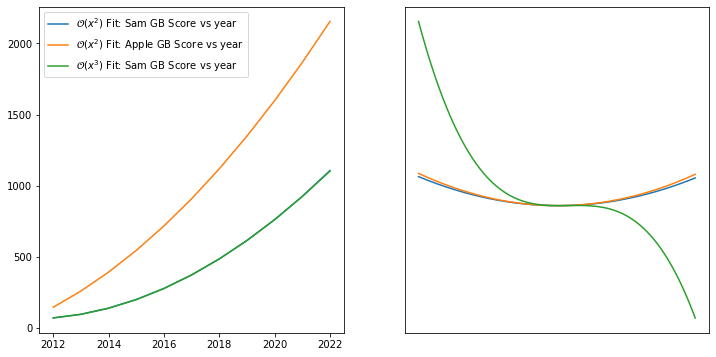

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
x = np.arange(2012,2023)
ax[0].plot(x,func_pow(x,*popt2),label=r"$\mathcal{O}(x^{2})$ Fit: Sam GB Score vs year")
ax[0].plot(x,func_pow(x,*popt4),label=r"$\mathcal{O}(x^{2})$ Fit: Apple GB Score vs year")
ax[0].plot(x,func_pow_3(x,*popt3),label=r"$\mathcal{O}(x^{3})$ Fit: Sam GB Score vs year")
ax[0].legend()
x = np.arange(1000,3000)
ax[1].plot(x,func_pow(x,*popt2))
ax[1].plot(x,func_pow(x,*popt4))
ax[1].plot(x,func_pow_3(x,*popt3))
ax[1].set_yticks([])
ax[1].set_xticks([])
plt.show()

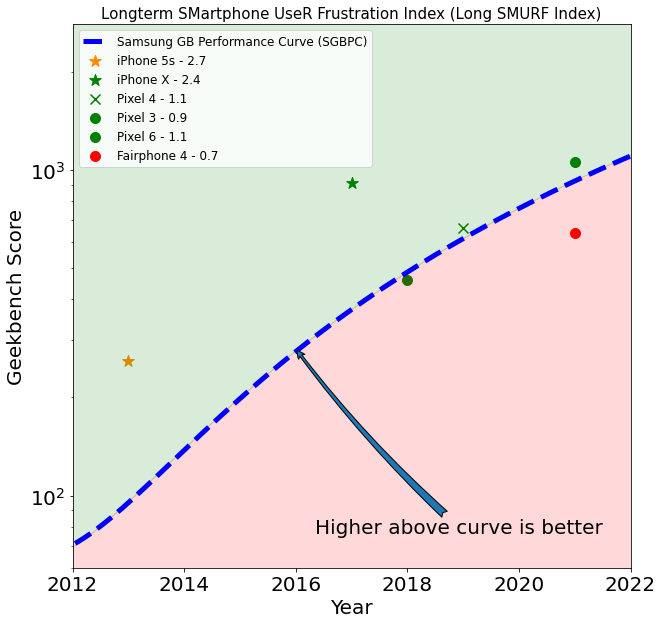

In [14]:
fig,ax=plt.subplots(figsize=(10,10))
#plt.scatter(sam[:,1],sam[:,0],color='blue',marker='x',s=100)
#p2=plt.scatter(my[:,1],my[:,0],marker='+',s=200,color='r',label='My Devices')
_=plt.scatter(iphone5s[1],iphone5s[0],label='iPhone 5s - '+str(np.round(iphone5s[0]/func_pow(iphone5s[1], *popt2),1)),marker='*',color='darkorange',s=150)
p3=plt.scatter(iphoneX[1],iphoneX[0],label='iPhone X - '+str(np.round(iphoneX[0]/func_pow(iphoneX[1], *popt2),1)),marker='*',color='green',s=150)
_=plt.scatter(pixel4[1],pixel4[0],label='Pixel 4 - '+str(np.round(pixel4[0]/func_pow(pixel4[1], *popt2),1)),color='g',s=100,marker='x')
_=plt.scatter(my[1,1],my[1,0],label='Pixel 3 - '+str(np.round(my[1,0]/func_pow(my[1,1], *popt2),1)),color='green',s=100)
_=plt.scatter(my[2,1],my[2,0],label='Pixel 6 - '+str(np.round(my[2,0]/func_pow(my[2,1], *popt2),1)),color='green',s=100)
_=plt.scatter(my[3,1],my[3,0],label='Fairphone 4 - '+str(np.round(my[3,0]/func_pow(my[3,1], *popt2),1)),color='r',s=100)
#plt.plot(np.array([2010,2025]), func_lin(np.array([2010,2025]), *popt1),color='black',linestyle='--')
xran=np.arange(2000,2023,.1)
#p1=plt.plot(xran, func_pow(xran, *popt2),color='blue',linestyle='--',linewidth=5,label='Samsung GB Performance Curve')
p1=plt.plot(xran, func_pow_3(xran, *popt3),color='blue',linestyle='--',linewidth=5,label='Samsung GB Performance Curve (SGBPC)')
plt.fill_between(xran, func_pow(xran, *popt2),color='red',alpha=0.15)
plt.fill_between(xran, func_pow(xran, *popt2),y2=np.ones(len(xran))*2800,color='green',alpha=0.15)
#plot_good_for((460,2018),popt1)
plt.xlim(2012,2022)
plt.ylim(60.,2800)
#plt.legend([p1,p2,p3],['1','2','3'],loc='upper left',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Geekbench Score',fontsize=20)
#plt.plot(sam_up[:,1], func_lin(sam_up[:,1], *popt_u),color='green')
#_=plt.plot(sam_do[:,1], func_lin(sam_do[:,1], *popt_d),color='orange')
ax.set_yscale('log')
plt.legend(loc='upper left',fontsize=12)
plt.title('Longterm SMartphone UseR Frustration Index (Long SMURF Index)',fontsize=15)
plt.annotate('Higher above curve is better',xy=[2016,282],  xycoords='data',xytext=[2021.5,80],ha="right", va="center",arrowprops=dict(arrowstyle='fancy',connectionstyle="arc3,rad=-0.05"),fontsize=20)
plt.show()

In [7]:
ave = 0
for i in range(7):
    ave= ave + func_pow(2013+i,*popt4)/func_pow(2013+i,*popt2)
ave = ave/7
print(ave)

2.542264366090154


In [8]:
perform = np.array(((0,0),(0.5,2),(1,4),(ave,6)))

In [9]:
popt1, pcov1 = curve_fit(func_pow, perform[:,0], perform[:,1])

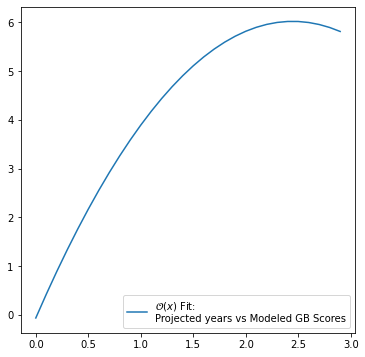

In [85]:
fig,ax=plt.subplots(figsize=(6,6))
x = np.arange(0,3,.1)
plt.plot(x,func_pow(x,*popt1),label=r"$\mathcal{O}(x)$ Fit:"
         "\n"
         "Projected years vs Modeled GB Scores")
plt.legend()
plt.show()

In [78]:
popt5, pcov5 = curve_fit(func_lin,[0,func_pow(np.round(102/func_pow(2013, *popt2),1), *popt1),func_pow(np.round(1598/func_pow(2021, *popt2),1), *popt1)],[0,640,850])

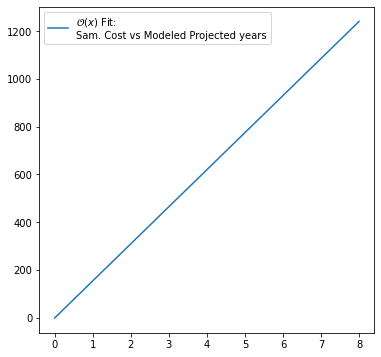

In [84]:
fig,ax=plt.subplots(figsize=(6,6))
x = np.arange(0,9,1)
plt.plot(x,func_lin(x,*popt5),label=r"$\mathcal{O}(x)$ Fit:"
        "\n"
        "Sam. Cost vs Modeled Projected years")
plt.legend()
plt.show()

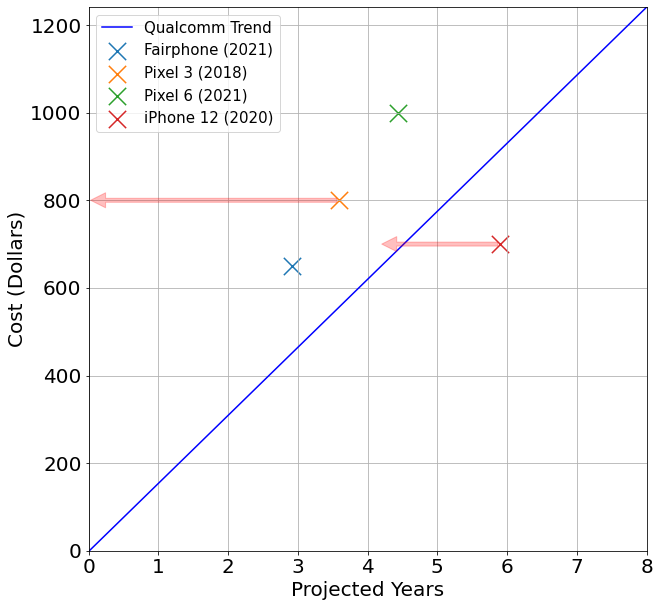

In [11]:
fig,ax=plt.subplots(figsize=(10,10))

print()


opt = dict(color='red',alpha=.25,
        arrowstyle = 'simple,head_width=.75,head_length=.75',
        connectionstyle = 'arc3,rad=0')

ax.scatter(func_pow(np.round(640/func_pow(2021, *popt2),1),*popt1),650,label='Fairphone (2021)',s=300,marker='x')

ax.scatter(func_pow(np.round(460/func_pow(2018, *popt2),1), *popt1),800,label='Pixel 3 (2018)',s=300,marker='x')
ax.annotate('',xy=(0,800),xytext=(func_pow(np.round(460/func_pow(2018, *popt2),1), *popt1),800),xycoords='data',arrowprops=opt,size=20,color='orange')

ax.scatter(func_pow(np.round(1090/func_pow(2021, *popt2),1), *popt1),1000,label='Pixel 6 (2021)',s=300,marker='x')
#ax.annotate('',xy=(func_pow(np.round(1090/func_pow(2021, *popt2),1), *popt1),1000),xytext=(func_pow(np.round(1090/func_pow(2021, *popt2),1)-(2021-2021),*popt1),1000),xycoords='data',arrowprops=opt,size=20,color='blue')

ax.scatter(func_pow(np.round(1598/func_pow(2020, *popt2),1), *popt1),700,label='iPhone 12 (2020)',s=300,marker='x')
ax.annotate('',xy=(func_pow(np.round(1598/func_pow(2020, *popt2),1)-(2021-2020),*popt1),700),
            xytext=(func_pow(np.round(1598/func_pow(2020, *popt2),1), *popt1),700),xycoords='data',arrowprops=opt,size=20,color='blue')

xran=np.arange(0,9)
plt.plot(xran,func_lin(xran,*popt5),color='b',label='Qualcomm Trend')

plt.xlim(0,8)
plt.ylim(0,func_lin(8,*popt5))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both')
plt.xlabel('Projected Years',fontsize=20)
plt.ylabel('Cost (Dollars)',fontsize=20)
_=plt.legend(fontsize=15,loc='upper left')